# EEP 153: Project 4
## Team Normal Borlaug: A Study of Uganda VS Tanzania

This Python notebook walks through all of our deliverables, so you can run it and check out how everything works in addition to verify we have met all of our deliverables. ***Click*** on the Table of Contents to be directed to any deliverable you want to see.

However, before you run *anything* please run these installs so that everything works properly!

In [95]:
# Run these installs!
!pip install CFEDemands>=0.4.1
!pip install gspread>=5.0.1
!pip install gspread_pandas>=3.2.0
!pip install oauth2client>=4.1.3
!pip install plotly>=5.5.0
!pip install python-gnupg
!pip install ConsumerDemands
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zsh:1: 0.4.1 not found


zsh:1: 5.0.1 not found
zsh:1: 3.2.0 not found
zsh:1: 4.1.3 not found
zsh:1: 5.5.0 not found


## Table of Contents and Deliverables
1. <a href="#replicability-and-documentation"><span style="color:red;">[Deliverable 1.1[A]]</span> - Replicability and Documentation</a>
2. <a href="#document-goals"><span style="color:red;">[Deliverable 1.2[A]]</span> - Document Goals</a>
3. <a href="#unit-tests"><span style="color:red;">[Deliverable 1.3[A]]</span> - Unit Tests</a>
4. <a href="#choice-of-a-dataset"><span style="color:red;">[Deliverable 1.4[A]]</span> - Choice of a Dataset</a>
5. <a href="#estimate-demand-system"><span style="color:red;">[Deliverable 1.5[A]]</span> - Estimate Demand System</a>
6. <a href="#construct-nutrient-system"><span style="color:red;">[Deliverable 1.6[A]]</span> - Construct Nutrient System</a>
7. <a href="#nutritional-challenges-and-policy-goal"><span style="color:red;">[Deliverable 1.7[A]]</span> - Nutritional Challenges and Policy Goal</a>
8. <a href="#policy-options"><span style="color:red;">[Deliverable 1.8[B]]</span> - Policy Options</a>
9. <a href="#policy-cost"><span style="color:red;">[Deliverable 1.9[C]]</span> - Policy Cost</a>
10. <a href="#value-of-technical-innovation"><span style="color:red;">[Deliverable 1.10[C]]</span> - Value of Technical Innovation</a>
11. <a href="#works-cited"><span style="color:red;"></span> Works Cited</a>

## [Deliverable 1.1[A] - Replicability and Documentation](#replicability-and-documentation)

## [Deliverable 1.2[A] - Document Goals](#document-goals)

## [Deliverable 1.3[A] - Unit Tests](#unit-tests)

## [Deliverable 1.4[A] - Choice of a Dataset](#choice-of-a-dataset)

For this project, we will focus on neighboring Eastern African countries, Tanzania and Uganda. As such, we will use the following datasets, from `csv`, originating from the LSMS data catalog from the [World Bank Dataset](https://microdata.worldbank.org/index.php/catalog/lsms/?page=1&ps=15&repo=lsms).

Datasets used include:
- `tanzania_expenditures_2019-2020.csv`
- `uganda_expenditures_2019-2020.csv`
- `tanzania_fct.csv`
- `uganda_fct.csv`
- `tanzania_food_prices_2019-2020.csv`
- `uganda_food_prices_2019-2020.csv`
- `tanzania_HH_characteristics.csv`
- `uganda_HH_characteristics.csv`
- `uganda_rdi.csv`

Run these lines of code to display each of them!

In [96]:
# Expenditure Data for Tanzania

tanzania_expenditure_df = pd.read_csv("data/tanzania/tanzania_expenditures_2019-2020.csv")
tanzania_expenditure_df.head(5)

,i,t,m,Cassava Fresh,Chicken,Cooking Oil,Leafy Greens,Millet & Sorghum (flour),Salt,Sugar,...,Cassava Dry/Flour,Yams/Cocoyams,"Butter, Etc.",Milk (dry or canned),Sweets,Seeds,Eggs,Nuts,Other Meat,Rice (paddy)
0,0001-001-001,2019-20,Mainland Rural,1500.00,10400.0,875.0,1757.142857,10500.000000,200.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001-001-003,2019-20,Mainland Rural,1156.25,NaN,875.0,1415.476190,6000.000000,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001-001-004,2019-20,Dar Es Salaam,NaN,NaN,1800.0,NaN,NaN,200.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001-004-001,2019-20,Mainland Rural,NaN,NaN,1050.0,410.000000,7500.000000,250.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001-004-002,2019-20,Mainland Other Urban,NaN,NaN,1050.0,656.250000,7428.571429,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Nutritional Information of Foods for Tanzania

tanzania_fct_df = pd.read_csv("data/tanzania/tanzania_fct.csv")
tanzania_fct_df.head(5)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Cassava Fresh,1600,14.00,20.0,270,160,381.00,3.00,8.540,0.48,0.870,10,0.0,0.880,206.0,3.00
1,Chicken,2390,273.00,0.0,50,150,0.00,13.00,84.870,1.68,0.630,480,3.0,4.000,0.0,19.00
2,Cooking Oil,8840,0.00,0.0,0,0,0.00,0.00,0.000,0.00,0.000,0,0.0,0.000,0.0,0.00
3,Leafy Greens,22,1.09,0.0,0,40,4.07,0.32,0.375,0.00,0.082,0,0.0,0.071,15.2,0.31
4,Millet & Sorghum (flour),3740,109.00,90.0,840,80,721.00,30.00,46.680,2.87,4.160,0,0.0,3.800,0.0,17.00


In [98]:
# Tanzania Price Data

tanzania_p_df = pd.read_csv("data/new.csv")
tanzania_p_df.head(5)

,t,m,Beef,Bottled Beer,Bread,"Buns, Cakes And Biscuits","Butter, Etc.",Cassava Dry/Flour,Cassava Fresh,Chicken,...,Sugarcane,Sweet Potatoes,Sweets,Tea (dry),Vegetables (fresh),Vegetables (preserved),Wheat Flour,Wild Birds & Insects,Wine & Spirits,Yams/Cocoyams
0,2019-20,Dar Es Salaam,6000,4285.714286,2211.111111,2120.00000,10000,1450,782.342657,9000,...,1000.000000,883.928571,6666.666667,10000.00000,1633.823529,j,1300,j,6666.666667,1250.000000
1,2019-20.1,Mainland Other Urban,6000,4000.000000,2222.222222,2500.00000,8250,1000,769.230769,9000,...,585.714286,790.625000,6025.641026,11428.57143,1545.454545,1339.285714,1400,NaN,14666.666670,828.571429
2,2019-20.2,Mainland Rural,6000,4000.000000,2000.000000,2283.42246,6000,800,625.000000,8000,...,333.333333,666.666667,8333.333333,10000.00000,1500.000000,1000,1400,NaN,NaN,769.230769
3,2019-20.3,Zanzibar,9000,NaN,2000.000000,2000.00000,4000,1500,1000.000000,7500,...,NaN,1000.000000,15000.000000,10000.00000,1866.666667,NaN,1400,NaN,NaN,1666.666667


In [99]:
# Tanzania Household Characteristics

tanzania_hh_char_df = pd.read_csv("data/tanzania/tanzania_HH_characteristics.csv")
tanzania_hh_char_df.head(5)

,i,t,m,M 00-03,F 00-03,M 04-08,F 04-08,M 09-13,F 09-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log HSize
0,0001-001-001,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.693147
1,0001-001-003,2019-20,Mainland Rural,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.000000
2,0001-001-004,2019-20,Dar Es Salaam,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000
3,0001-004-001,2019-20,Mainland Rural,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1.098612
4,0001-004-002,2019-20,Mainland Other Urban,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.000000


In [100]:
# Expenditure Data for Uganda

uganda_expenditure_df = pd.read_csv("data/uganda/uganda_expenditures_2019-2020.csv")
uganda_expenditure_df.head(5)

,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4000.0,200.0,1000.0,NaN,NaN,NaN,3000.0,NaN
1,062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1000.0,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN
3,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5000.0,200.0,500.0,NaN,NaN,NaN,NaN,NaN
4,1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN


In [101]:
# Food Nutrition Data for Uganda

uganda_fct_df = pd.read_csv("data/uganda/uganda_fct.csv")
uganda_fct_df.head(5)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Avocado,1600,20.0,70.0,810,120,85.0,6.0,17.38,1.30,0.67,70,0.0,2.57,100,6.0
1,Beans (dry),1700,98.0,60.0,500,580,325.0,30.0,7.00,1.20,3.40,0,0.0,2.15,10,8.0
2,Beans (fresh),3470,214.0,160.0,5250,1130,626.0,51.0,11.74,2.12,7.13,0,0.0,4.74,63,23.0
3,Beef,2510,182.0,0.0,60,70,0.0,19.0,31.50,1.60,0.90,0,28.9,3.80,0,37.0
4,Beef (roasted),2910,264.0,0.0,70,90,0.0,27.0,37.20,2.20,0.90,0,24.7,3.40,0,60.0


In [102]:
# Uganda Food Prices Data

uganda_p_df = pd.read_csv("data/uganda/uganda_food_prices_2019-2020.csv")
uganda_p_df.head(5)

,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,2005-06,Central,650.000000,2500,3000.0,NaN,NaN,1400.0,3000.0,1400.0,...,NaN,54.054054,750.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2005-6,Eastern,550.000000,2400,2000.0,NaN,NaN,1000.0,3300.0,1050.0,...,NaN,40.000000,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2005-6,Northern,434.151414,2500,2400.0,NaN,NaN,1000.0,1500.0,1225.0,...,NaN,43.243243,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2005-6,Western,500.000000,2200,2500.0,NaN,NaN,1000.0,3000.0,1050.0,...,NaN,41.621622,200.0,1000.0,200.0,NaN,NaN,NaN,NaN,NaN
4,2009-10,Central,1350.000000,5000,4000.0,NaN,NaN,2400.0,4800.0,1750.0,...,NaN,108.108108,1000.0,800.0,300.0,NaN,NaN,NaN,NaN,NaN


In [103]:
# Uganda Household Characteristics

uganda_hh_char_df = pd.read_csv("data/uganda/uganda_HH_characteristics.csv")
uganda_p_df.head(5)

,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,2005-06,Central,650.000000,2500,3000.0,NaN,NaN,1400.0,3000.0,1400.0,...,NaN,54.054054,750.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2005-6,Eastern,550.000000,2400,2000.0,NaN,NaN,1000.0,3300.0,1050.0,...,NaN,40.000000,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
2,2005-6,Northern,434.151414,2500,2400.0,NaN,NaN,1000.0,1500.0,1225.0,...,NaN,43.243243,200.0,800.0,100.0,NaN,NaN,NaN,NaN,NaN
3,2005-6,Western,500.000000,2200,2500.0,NaN,NaN,1000.0,3000.0,1050.0,...,NaN,41.621622,200.0,1000.0,200.0,NaN,NaN,NaN,NaN,NaN
4,2009-10,Central,1350.000000,5000,4000.0,NaN,NaN,2400.0,4800.0,1750.0,...,NaN,108.108108,1000.0,800.0,300.0,NaN,NaN,NaN,NaN,NaN


In [104]:
# Uganda's RDIs, but we use as a comparison point for both Uganda and Tanzania.

rdi_df = pd.read_csv("data/uganda/uganda_rdi.csv")
rdi_df.head(5)

,n,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
0,Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
1,Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
2,Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
3,Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
4,Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


## [Deliverable 1.5[A] - Estimate Demand System](#estimate-demand-system)

In [105]:
# Reading in pickled data

result_uganda = cfe.regression.read_pickle("uganda.pickle")
result_tanzania = cfe.regression.read_pickle("tanzania.pickle")

## [Deliverable 1.6[A] - Construct Nutrient System](#construct-nutrient-system)

In [106]:
# Reading the expenditures dataset for Uganda
x_uganda = pd.read_csv("data/uganda/uganda_expenditures_2019-2020.csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_uganda.columns:
    x_uganda['m'] = 1

# Setting a multi-level index
x_uganda = x_uganda.set_index(['i', 't', 'm'])
x_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_uganda = x_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_uganda = x_uganda.replace(0, np.nan)

# Reading the household characteristics dataset for Uganda
z_uganda = pd.read_csv("data/uganda/uganda_HH_characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_uganda.columns:
    z_uganda['m'] = 1

# Setting a multi-level index
z_uganda = z_uganda.set_index(['i', 't', 'm'])
z_uganda.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_uganda = z_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the prices dataset for Uganda
p_uganda = pd.read_csv("data/uganda/uganda_food_prices_2019-2020.csv")

# If the 'm' column is not present, add it
if 'm' not in p_uganda.columns:
    p_uganda['m'] = 1

# Setting a multi-level index
p_uganda = p_uganda.set_index(['t', 'm'])
p_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_uganda = p_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_uganda = p_uganda.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Uganda
fct_uganda = pd.read_csv("data/uganda/uganda_fct.csv")

# Setting 'j' as the index
fct_uganda = fct_uganda.set_index('j')
fct_uganda.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_uganda = fct_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the Recommended Dietary Intakes (RDI) for Uganda
rdi_uganda = pd.read_csv("data/uganda/uganda_rdi.csv")

# Setting 'n' as the index
rdi_uganda = rdi_uganda.set_index('n')
rdi_uganda.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

# Displaying the sorted beta values for Uganda
print("For Uganda:")
result_uganda.get_beta().sort_values(ascending=False)

For Uganda:


j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

In [107]:
# Reading the food expenditures dataset for Tanzania
x_tanzania = pd.read_csv("data/tanzania/tanzania_expenditures_2019-2020.csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_tanzania.columns:
    x_tanzania['m'] = 1

# Setting a multi-level index
x_tanzania = x_tanzania.set_index(['i', 't', 'm'])
x_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_tanzania = x_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_tanzania = x_tanzania.replace(0, np.nan)

# Reading the household characteristics dataset for Tanzania
z_tanzania = pd.read_csv("data/tanzania/tanzania_HH_characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_tanzania.columns:
    z_tanzania['m'] = 1

# Setting a multi-level index
z_tanzania = z_tanzania.set_index(['i', 't', 'm'])
z_tanzania.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_tanzania = z_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Assuming the 'new.csv' file is related to Tanzania's price data. The original naming wasn't clear.
p_tanzania = pd.read_csv("data/new.csv")

# If the 'm' column is not present, add it
if 'm' not in p_tanzania.columns:
    p_tanzania['m'] = 1

# Setting a multi-level index
p_tanzania = p_tanzania.set_index(['t', 'm'])
p_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_tanzania = p_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_tanzania = p_tanzania.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Tanzania
fct_tanzania = pd.read_csv("data/tanzania/tanzania_fct.csv")

# Setting 'j' as the index
fct_tanzania = fct_tanzania.set_index('j')
fct_tanzania.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_tanzania = fct_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# We use the same RDI for comparisons.
rdi_tanzania = pd.read_csv("data/uganda/uganda_rdi.csv")

# Setting 'n' as the index
rdi_tanzania = rdi_tanzania.set_index('n')
rdi_tanzania.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression for Tanzania
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

# Displaying the sorted beta values for Tanzania
print("For Tanzania:")
result_tanzania.get_beta().sort_values(ascending=False)

For Tanzania:


j
Citrus Fruits               1.130966
Ripe Bananas                0.977499
Leafy Greens                0.671702
Plantains                   0.573747
Irish Potatoes              0.569504
Sweet Potatoes              0.560885
Vegetables (fresh)          0.515630
Soft drinks                 0.477239
Buns, Cakes And Biscuits    0.444066
Coconuts                    0.423381
Fish (fresh)                0.417848
Milk (fresh)                0.412032
Cassava Fresh               0.395648
Sugar                       0.394992
Cooking Oil                 0.391770
Macaroni, Spaghetti         0.390850
Wheat Flour                 0.390105
Pulses                      0.378353
Beef                        0.377320
Tea (dry)                   0.374065
Rice (husked)               0.310996
Bread                       0.300077
Chicken                     0.245496
Salt                        0.205973
Fish (dried)                0.188521
Maize (flour)               0.184789
Name: beta, dtype: float64

In [108]:
result = cfe.read_pickle('uganda.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

aligned_nutrients, aligned_hh_rwi = nutrients[use_nutrients].align(hh_rwi[use_nutrients], axis=0)
nutrient_ratio_uganda = (aligned_nutrients / aligned_hh_rwi).dropna()

nutrient_ratio_uganda

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_66774/1924708405.py:21: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  aligned_nutrients, aligned_hh_rwi = nutrients[use_nutrients].align(hh_rwi[use_nutrients], axis=0)


n                                                   Energy   Protein  \
t       m       i                                                      
2019-20 Central 1013000201                        5.884109  4.847370   
                1013000202                        0.868898  1.090581   
                1013000204                        5.905644  5.359365   
                1021000108                        1.088746  0.957162   
                1021000109                        1.189886  1.149596   
...                                                    ...       ...   
        Western _62                               1.180510  1.410812   
                _67                               1.730572  1.937336   
                a98bebba177243668464e31f6d2bb92d  0.705221  0.823221   
                acb16f9b068549d8a80a37c9d638742f  0.630157  0.826553   
                d10a687889de469687377204195f3db0  0.699029  0.750929   

n                                                    Fiber    Folate  \
t       m       i                                                      
2019-20 Central 1013000201                        4.588274  3.995576   
                1013000202                        0.680637  0.837707   
                1013000204                        4.460754  5.108189   
                1021000108                        0.865706  0.888787   
                1021000109                        0.898021  0.996334   
...                                                    ...       ...   
        Western _62                               1.046022  1.349281   
                _67                               1.530759  2.074008   
                a98bebba177243668464e31f6d2bb92d  0.748134  0.861263   
                acb16f9b068549d8a80a37c9d638742f  0.601074  0.757318   
                d10a687889de469687377204195f3db0  0.688624  0.768997   

n                                                  Calcium  Carbohydrate  \
t       m       i                                                          
2019-20 Central 1013000201                        2.249185      9.210316   
                1013000202                        0.308557      1.032626   
                1013000204                        3.676194     12.838367   
                1021000108                        0.490240      1.669507   
                1021000109                        0.624865      2.140854   
...                                                    ...           ...   
        Western _62                               0.589793      2.284626   
                _67                               1.063379      4.503851   
                a98bebba177243668464e31f6d2bb92d  0.312341      1.486938   
                acb16f9b068549d8a80a37c9d638742f  0.266431      1.107593   
                d10a687889de469687377204195f3db0  0.304688      1.500933   

n                                                      Iron    Niacin  \
t       m       i                                                       
2019-20 Central 1013000201                         7.543653  4.520951   
                1013000202                         0.822692  0.818673   
                1013000204                        10.136205  5.390137   
                1021000108                         1.551943  0.883203   
                1021000109                         0.924535  1.083579   
...                                                     ...       ...   
        Western _62                                1.194158  1.328281   
                _67                                3.306612  1.984583   
                a98bebba177243668464e31f6d2bb92d   0.733158  0.826839   
                acb16f9b068549d8a80a37c9d638742f   0.624440  0.731831   
                d10a687889de469687377204195f3db0   1.057215  0.739356   

n                                                 Riboflavin   Thiamin  \
t       m       i                                                        
2019-20 Central 1013000201             

In [109]:
result = cfe.read_pickle('tanzania.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio_tanzania

n                                     Energy   Protein     Fiber    Folate  \
t       m             i                                                      
2019-20 Dar Es Salaam 0001-001-004  2.612128  2.967917  1.487057  1.685255   
                      0034-001-001  1.192043  1.308199  0.649610  0.649648   
                      0042-001-001  1.107394  1.365626  0.559382  0.530778   
                      0051-001-002  1.353415  1.458640  0.667812  0.753157   
                      0051-001-003  1.938710  2.234089  1.105489  0.951678   
...                                      ...       ...       ...       ...   
                      0686-001-001  2.080288  2.495543  1.030057  0.901828   
                      0701-003-001  1.631082  1.978008  0.812825  0.782264   
                      0809-001-008  2.391341  2.666470  1.376775  1.282068   
                      0858-001-001  0.892815  0.939240  0.385354  0.357916   
                      0858-001-002  1.591848  1.683475  0.762179  0.782695   

n                                    Calcium  Carbohydrate      Iron  \
t       m             i                                                
2019-20 Dar Es Salaam 0001-001-004  1.003479      8.112252  3.504556   
                      0034-001-001  0.296197      3.122856  1.011541   
                      0042-001-001  0.260461      2.667862  0.664292   
                      0051-001-002  0.435325      4.071950  1.588951   
                      0051-001-003  0.528719      4.749082  1.044719   
...                                      ...           ...       ...   
                      0686-001-001  0.447684      4.201362  1.114236   
                      0701-003-001  0.360527      3.392980  0.907858   
                      0809-001-008  0.768619      6.877336  1.644441   
                      0858-001-001  0.185945      2.254394  0.473859   
                      0858-001-002  0.321367      4.422355  1.113821   

n                                     Niacin  Riboflavin   Thiamin  Vitamin A  \
t       m             i                                                         
2019-20 Dar Es Salaam 0001-001-004  2.667874    2.116337  2.692244   0.786657   
                      0034-001-001  1.036847    0.871556  1.085621   0.374837   
                      0042-001-001  0.995099    0.730325  0.891166   0.263934   
                      0051-001-002  1.235620    0.957714  1.219293   0.292490   
                      0051-001-003  1.711793    1.421636  1.593160   0.683706   
...                                      ...         ...       ...        ...   
                      0686-001-001  1.695771    1.320523  1.516319   0.549460   
                      0701-003-001  1.417692    1.110805  1.317224   0.446936   
                      0809-001-008  2.251619    1.824064  2.144881   0.781387   
                      0858-001-001  0.730474    0.548848  0.656248   0.156126   
                      0858-001-002  1.301007    1.027374  1.307004   0.408376   

n                                   Vitamin B-12  Vitamin B-6  Vitamin C  \
t       m             i                                                    
2019-20 Dar Es Salaam 0001-001-004      3.227225     3.831207   1.828839   
                      0034-001-001      1.069940     1.378241   0.525715   
                      0042-001-001      1.122908     1.315708   0.576633   
                      0051-001-002      1.574321     1.655294   0.649069   
                      0051-001-003      2.021591     2.686202   1.463237   
...                                          ...          ...        ...   
                      0686-001-001      2.147907     2.485001   1.169691   
                      0701-003-001      1.640401     1.949301   0.838020   
                      0809-001-008      2.624121     3.379990   1.781704   
                      0858-001-001      0.854620     0.877991   0.301881   
                      0858-001-002      1.287431     1.883244   0.940493   

n    

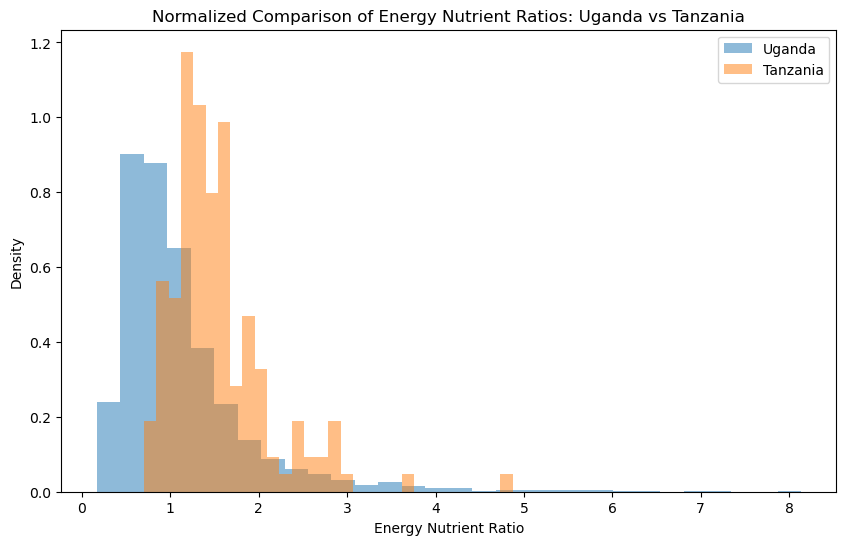

In [110]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Energy'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Energy'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Energy Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Energy Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

In [111]:
uganda_p_df = uganda_p_df.set_index(['t','m'])
uganda_p_df.columns.name = 'j'

uganda_p_df = uganda_p_df.apply(lambda x: pd.to_numeric(x,errors='coerce'))
uganda_p_df = uganda_p_df.replace(0,np.nan)

uganda_fct_df

uganda_fct_df = uganda_fct_df.set_index('j')
uganda_fct_df.columns.name = 'n'

uganda_fct_df = uganda_fct_df.apply(lambda x: pd.to_numeric(x,errors='coerce'))


rdi_df = rdi_df.set_index('n')
rdi_df.columns.name = 'k'

pbar_uga = uganda_p_df.xs('2019-20',level='t').mean()
pbar_uga = pbar_uga[result_uganda.beta.index]

xhat_uga = result_uganda.predicted_expenditures()

# Total food expenditures per household
xbar_uga = xhat_uga.groupby(['i','t','m']).sum()

# Reference budget
xref_uga = xbar_uga.quantile(0.5)

def my_prices(p0,uganda_p_df=pbar_uga,j='Millet'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    uganda_p_df = uganda_p_df.copy()
    uganda_p_df.loc[j] = p0
    return uganda_p_df

qhat_uga = (xhat_uga.unstack('j')/pbar_uga).dropna(how='all')

# Drop missing columns
qhat_uga = qhat_uga.loc[:,qhat_uga.count()>0]

def nutrient_demand(uganda_expenditure_df,uganda_p_df):
    c = result_uganda.demands(uganda_expenditure_df,uganda_p_df)
    fct0,c0 = uganda_fct_df.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

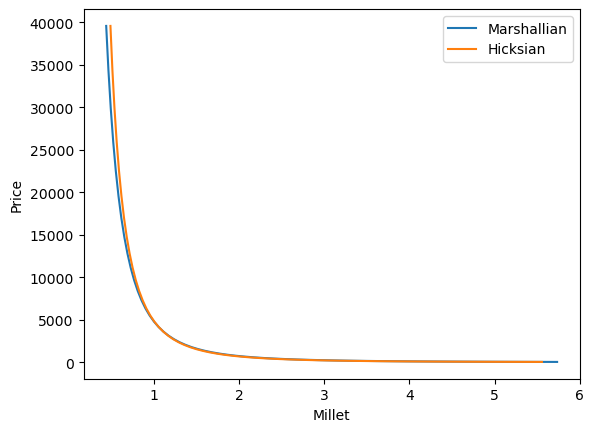

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

my_j = 'Millet'  # Interesting Ugandan staple

P = np.geomspace(.01,10,50)*pbar_uga[my_j]

# Utility of median household, given prices
U0 = result_uganda.indirect_utility(xref_uga,pbar_uga)

plt.plot([result_uganda.demands(xref_uga,my_prices(p0,j=my_j))[my_j] for p0 in P],P)
plt.plot([result_uganda.demands(U0,my_prices(p0,j=my_j),type="Hicksian")[my_j] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_j)
plt.legend(("Marshallian","Hicksian"))

In [113]:
def compensating_variation(U0,p0,p1):
    x0 = result_uganda.expenditure(U0,p0)
    x1 = result_uganda.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = result_uganda.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian')

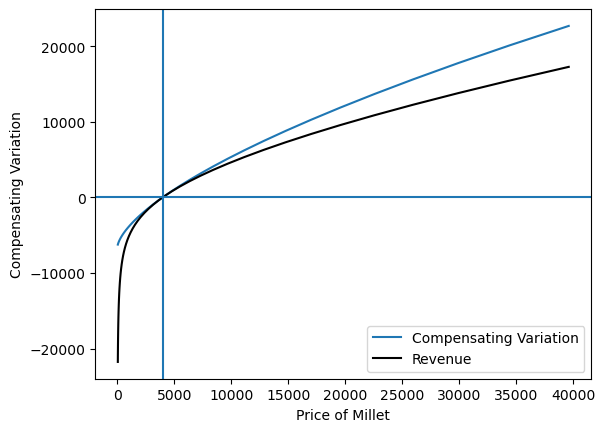

In [114]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,pbar_uga,my_prices(p0,j=my_j)) for p0 in P])
ax1.set_xlabel(f"Price of {my_j}")
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,pbar_uga,my_prices(p0,j=my_j),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(pbar_uga.loc[my_j])

Text(0, 0.5, 'Deadweight Loss')

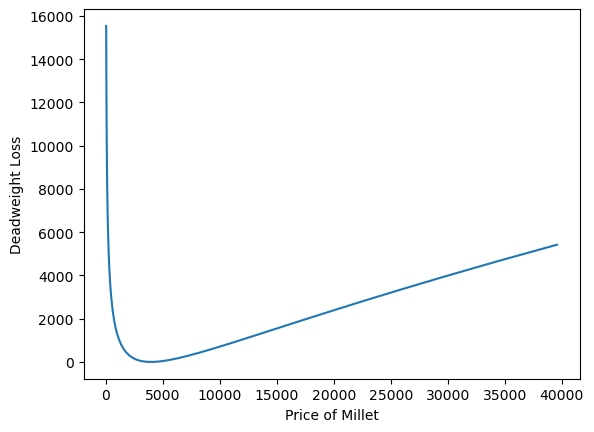

In [115]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,pbar_uga,my_prices(p0,j=my_j)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_j)
ax1.set_ylabel("Deadweight Loss")

In [116]:
tanzania_p_df

,t,m,Beef,Bottled Beer,Bread,"Buns, Cakes And Biscuits","Butter, Etc.",Cassava Dry/Flour,Cassava Fresh,Chicken,...,Sugarcane,Sweet Potatoes,Sweets,Tea (dry),Vegetables (fresh),Vegetables (preserved),Wheat Flour,Wild Birds & Insects,Wine & Spirits,Yams/Cocoyams
0,2019-20,Dar Es Salaam,6000,4285.714286,2211.111111,2120.00000,10000,1450,782.342657,9000,...,1000.000000,883.928571,6666.666667,10000.00000,1633.823529,j,1300,j,6666.666667,1250.000000
1,2019-20.1,Mainland Other Urban,6000,4000.000000,2222.222222,2500.00000,8250,1000,769.230769,9000,...,585.714286,790.625000,6025.641026,11428.57143,1545.454545,1339.285714,1400,NaN,14666.666670,828.571429
2,2019-20.2,Mainland Rural,6000,4000.000000,2000.000000,2283.42246,6000,800,625.000000,8000,...,333.333333,666.666667,8333.333333,10000.00000,1500.000000,1000,1400,NaN,NaN,769.230769
3,2019-20.3,Zanzibar,9000,NaN,2000.000000,2000.00000,4000,1500,1000.000000,7500,...,NaN,1000.000000,15000.000000,10000.00000,1866.666667,NaN,1400,NaN,NaN,1666.666667


In [117]:
tanzania_p_df = tanzania_p_df.set_index(['t','m'])
tanzania_p_df.columns.name = 'j'

tanzania_p_df = tanzania_p_df.apply(lambda x: pd.to_numeric(x,errors='coerce'))
tanzania_p_df = tanzania_p_df.replace(0,np.nan)


tanzania_fct_df = tanzania_fct_df.set_index('j')
tanzania_fct_df.columns.name = 'n'

tanzania_fct_df = tanzania_fct_df.apply(lambda x: pd.to_numeric(x,errors='coerce'))


# rdi_df = rdi_df.set_index('n')
# rdi_df.columns.name = 'k'

pbar_tan = tanzania_p_df.xs('2019-20',level='t').mean()
pbar_tan = pbar_tan[result_tanzania.beta.index]

xhat_tan = result_tanzania.predicted_expenditures()

# Total food expenditures per household
xbar_tan = xhat_tan.groupby(['i','t','m']).sum()

# Reference budget
xref_tan = xbar_tan.quantile(0.5)

def my_prices(p0,tanzania_p_df=pbar_tan,j='Millet'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    tanzania_p_df = tanzania_p_df.copy()
    tanzania_p_df.loc[j] = p0
    return tanzania_p_df

qhat_tan = (xhat_tan.unstack('j')/pbar_tan).dropna(how='all')

# Drop missing columns
qhat_tan = qhat_tan.loc[:,qhat_tan.count()>0]

def nutrient_demand(tanzania_expenditure_df,tanzania_p_df):
    c = result_tanzania.demands(tanzania_expenditure_df,tanzania_p_df)
    fct0,c0 = tanzania_fct_df.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

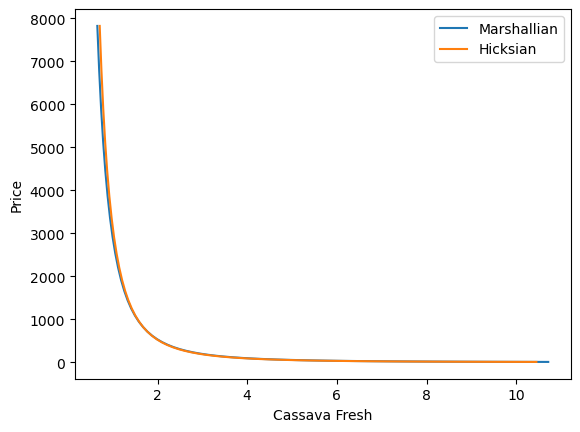

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

my_j = 'Cassava Fresh'  

P = np.geomspace(.01,10,50)*pbar_tan[my_j]

# Utility of median household, given prices
U0 = result_tanzania.indirect_utility(xref_tan,pbar_tan)

plt.plot([result_tanzania.demands(xref_tan,my_prices(p0,j=my_j))[my_j] for p0 in P],P)
plt.plot([result_tanzania.demands(U0,my_prices(p0,j=my_j),type="Hicksian")[my_j] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_j)
plt.legend(("Marshallian","Hicksian"))

## [Deliverable 1.7[A] - Nutritional Challenges and Policy Goal](#nutritional-challenges-and-policy-goal)

## The Specific Micronutrients of Focus: Vitamin A, Vitamin C, Vitamins B-9, and B-1

Both Tanzania and Uganda face a variety of nutritional challenges. More specifically, issues with lacking micronutrients is common in both of these countries. Micronutrients refers to vitamins and minerals, which are essential for the function of the body, fighting disease, and overall healthy development of the body. 

## Vitamin C in Tanzania and Uganda

 Significant micronutrient for growing and repairing tissue all around the body. It creates and supports production of collagen, protein, cartilage, and blood vessels, as well as assists repairing wounds and bones.

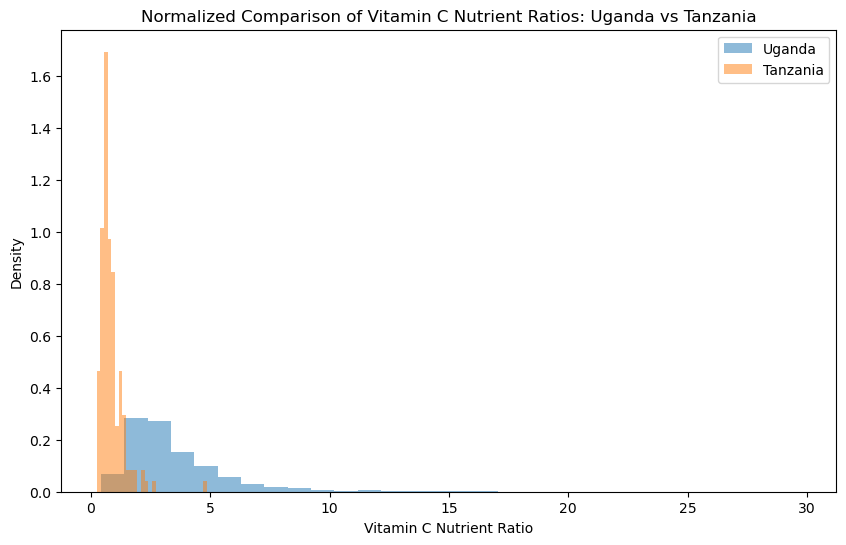

In [119]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Vitamin C'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Vitamin C'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Vitamin C Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Vitamin C Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

# Vitamin A in Tanzania and Uganda
 Vitamin A is supports vision, the immune system, reproduction, and growth and development. It also helps your heart, lungs, and other organs function.

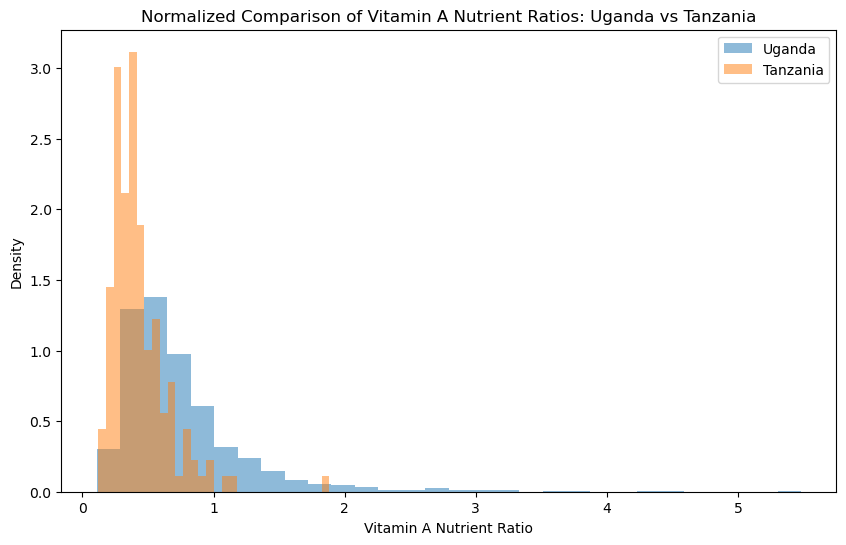

In [120]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Vitamin A'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Vitamin A'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Vitamin A Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Vitamin A Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

# Vitamin B-9 (Folate) in Tanzania and Uganda

Folate (vitamin B-9) is important in red blood cell formation and for healthy cell growth and function. The nutrient is crucial during early pregnancy to reduce the risk of birth defects of the brain and spine. Folate is found mainly in dark green leafy vegetables, beans, peas and nuts.

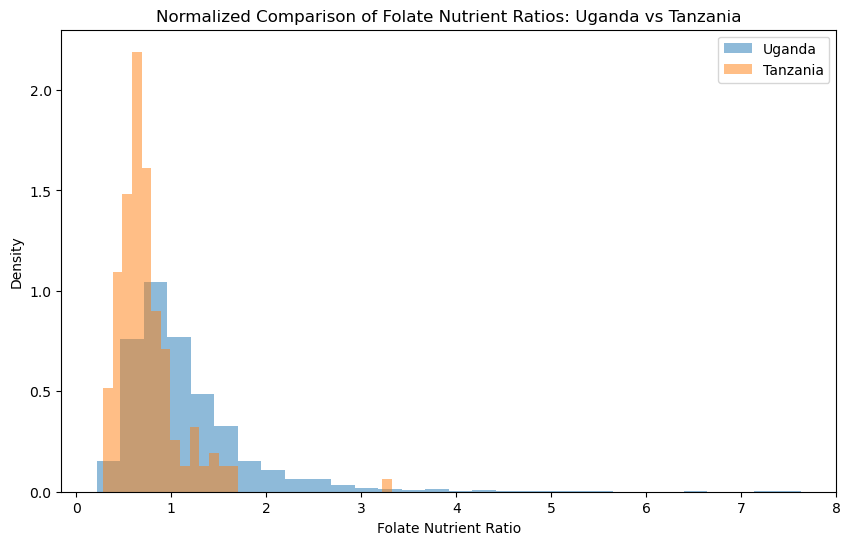

In [121]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Folate'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Folate'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Folate Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Folate Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

# Vitamin B-1 (Thiamine) in Tanzania and Uganda

Thiamine supports the body in turning food into energy and to keep the nervous system functioning. Your body is not able to make thiamine for itself, so it must be sourced from foods. 

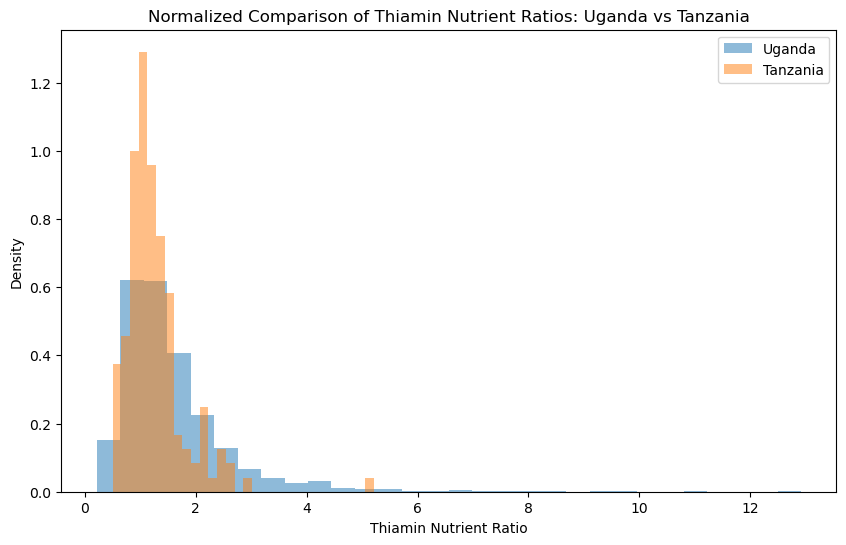

In [122]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Thiamin'], bins=30, alpha=0.5, label='Uganda', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Thiamin'], bins=30, alpha=0.5, label='Tanzania', density=True)

plt.title('Normalized Comparison of Thiamin Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Thiamin Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

## [Deliverable 1.8[B] - Policy Options](#policy-options)

In this section, we will explore a variety of different GMO-related policies. Based upon research, we found that within these countries, GMO use is illegal. Our research aims to fight against this law and show how using GMOs within policy can greatly aid individuals of the population in meeting nutritional goals.

***In terms of policy, this would imply a mandate in utilizing GMO-based crops and foods within the society.***

### [Policy 1: GMO-Grown Maize with Increased 100mg of Vitamin C per Unit](#policy-options)

Run the code cells to simulate the difference!

In [149]:
x_tanzania_gmo = pd.read_csv("data/tanzania/tanzania_expenditures_2019-2020.csv")
if 'm' not in x_tanzania_gmo.columns:
    x_tanzania['m'] = 1
x_tanzania_gmo = x_tanzania_gmo.set_index(['i', 't', 'm'])
x_tanzania_gmo.columns.name = 'j'
x_tanzania_gmo = x_tanzania_gmo.apply(lambda x: pd.to_numeric(x, errors='coerce'))
x_tanzania_gmo = x_tanzania_gmo.replace(0, np.nan)
z_tanzania_gmo = pd.read_csv("data/tanzania/tanzania_HH_characteristics.csv")
if 'm' not in z_tanzania_gmo.columns:
    z_tanzania_gmo['m'] = 1
z_tanzania_gmo = z_tanzania_gmo.set_index(['i', 't', 'm'])
z_tanzania_gmo.columns.name = 'k'
z_tanzania_gmo = z_tanzania_gmo.apply(lambda x: pd.to_numeric(x, errors='coerce'))
p_tanzania_gmo = pd.read_csv("data/new.csv")
if 'm' not in p_tanzania_gmo.columns:
    p_tanzania_gmo['m'] = 1
p_tanzania_gmo = p_tanzania_gmo.set_index(['t', 'm'])
p_tanzania_gmo.columns.name = 'j'
p_tanzania_gmo = p_tanzania_gmo.apply(lambda x: pd.to_numeric(x, errors='coerce'))
p_tanzania_gmo = p_tanzania_gmo.replace(0, np.nan)
fct_tanzania_gmo = pd.read_csv("data/tanzania/tanzania_fct.csv")
fct_tanzania_gmo = fct_tanzania_gmo.set_index('j')
fct_tanzania_gmo.columns.name = 'n'
fct_tanzania_gmo = fct_tanzania_gmo.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# This line increases the Vitamin C levels.
additional_vitamin_c = 100
fct_tanzania_gmo.loc['Maize (flour)', 'Vitamin C'] += additional_vitamin_c

rdi_tanzania_gmo = pd.read_csv("data/uganda/uganda_rdi.csv")
rdi_tanzania_gmo = rdi_tanzania_gmo.set_index('n')
rdi_tanzania_gmo.columns.name = 'k'
result_tanzania_gmo = cfe.Regression(y=np.log(x_tanzania_gmo.stack()), d=z_tanzania_gmo)
xhat = result_tanzania_gmo .predicted_expenditures()
qhat = (xhat.unstack('j')/p_tanzania_gmo).dropna(how='all')
qhat = qhat.loc[:,qhat.count()>0]
use = fct_tanzania_gmo.index.intersection(qhat.columns)
nutrients = qhat[use]@fct_tanzania_gmo.loc[use,:]
nutrients.mean() 

z = z_tanzania_gmo[rdi_tanzania_gmo.columns.tolist()]

hh_rdi = z@rdi_tanzania_gmo.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania_gmo = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio_tanzania_gmo

n                                     Energy   Protein     Fiber    Folate  \
t       m             i                                                      
2019-20 Dar Es Salaam 0001-001-004  2.552530  2.902643  1.434663  1.546364   
                      0034-001-001  1.184993  1.299374  0.636021  0.620317   
                      0042-001-001  1.104204  1.362988  0.557508  0.529565   
                      0051-001-002  1.360813  1.465849  0.665924  0.735789   
                      0051-001-003  1.929961  2.227054  1.097113  0.947834   
...                                      ...       ...       ...       ...   
                      0686-001-001  2.086514  2.499240  1.038065  0.902201   
                      0701-003-001  1.628523  1.972202  0.809282  0.781307   
                      0809-001-008  2.378187  2.654472  1.359475  1.242819   
                      0858-001-001  0.893162  0.937225  0.385091  0.359444   
                      0858-001-002  1.581495  1.675595  0.749444  0.764996   

n                                    Calcium  Carbohydrate      Iron  \
t       m             i                                                
2019-20 Dar Es Salaam 0001-001-004  0.920107      7.884524  3.290193   
                      0034-001-001  0.282014      3.105873  0.976062   
                      0042-001-001  0.260044      2.658900  0.664128   
                      0051-001-002  0.424101      4.086091  1.569122   
                      0051-001-003  0.526130      4.722113  1.040701   
...                                      ...           ...       ...   
                      0686-001-001  0.448014      4.219678  1.115922   
                      0701-003-001  0.358233      3.385149  0.905769   
                      0809-001-008  0.745503      6.821273  1.611130   
                      0858-001-001  0.185485      2.258096  0.474672   
                      0858-001-002  0.316492      4.389482  1.096450   

n                                     Niacin  Riboflavin   Thiamin  Vitamin A  \
t       m             i                                                         
2019-20 Dar Es Salaam 0001-001-004  2.537535    1.978182  2.505049   0.773387   
                      0034-001-001  1.010614    0.840581  1.044155   0.360379   
                      0042-001-001  0.994753    0.729059  0.889846   0.266543   
                      0051-001-002  1.227464    0.942892  1.198431   0.291952   
                      0051-001-003  1.707394    1.415201  1.586332   0.670759   
...                                      ...         ...       ...        ...   
                      0686-001-001  1.696829    1.320873  1.519133   0.565476   
                      0701-003-001  1.413226    1.105201  1.313691   0.437491   
                      0809-001-008  2.219006    1.782360  2.093420   0.778123   
                      0858-001-001  0.729493    0.547716  0.657532   0.152355   
                      0858-001-002  1.290073    1.014299  1.284578   0.409987   

n                                   Vitamin B-12  Vitamin B-6  Vitamin C  \
t       m             i                                                    
2019-20 Dar Es Salaam 0001-001-004      3.218614     3.742231   2.098437   
                      0034-001-001      1.069863     1.361830   0.729233   
                      0042-001-001      1.120951     1.314766   0.801983   
                      0051-001-002      1.593039     1.664637   0.841647   
                      0051-001-003      2.020219     2.673769   1.704293   
...                                          ...          ...        ...   
                      0686-001-001      2.141827     2.497883   1.540255   
                      0701-003-001      1.629714     1.937080   1.128967   
                      0809-001-008      2.633638     3.359232   2.036808   
                      0858-001-001      0.846758     0.873132   0.438041   
                      0858-001-002      1.288922     1.873954   1.130116   

n    

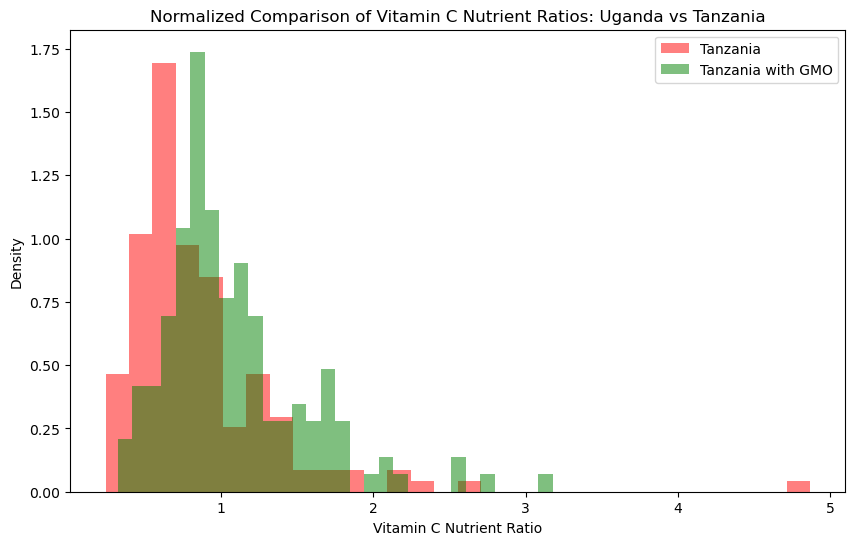

In [152]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Vitamin C'], bins=30, alpha=0.5, label='Tanzania', density=True, color="red")

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania_gmo['Vitamin C'], bins=30, alpha=0.5, label='Tanzania with GMO', density=True, color="green")

plt.title('Normalized Comparison of Vitamin C Nutrient Ratios: Uganda vs Tanzania')
plt.xlabel('Vitamin C Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

In [151]:
percentage_meeting_rdi_before = (nutrient_ratio_tanzania['Vitamin C'] >= 1).mean() * 100
percentage_meeting_rdi_after = (nutrient_ratio_tanzania_gmo['Vitamin C'] >= 1).mean() * 100

print(f"Percentage of population meeting/exceeding RDI for Vitamin C before GMO: {percentage_meeting_rdi_before:.2f}%")
print(f"Percentage of population meeting/exceeding RDI for Vitamin C after GMO: {percentage_meeting_rdi_after:.2f}%")

Percentage of population meeting/exceeding RDI for Vitamin C before GMO: 22.88%
Percentage of population meeting/exceeding RDI for Vitamin C after GMO: 45.70%


As shown, the percent of the population meeting/exceeding the RDI for Vitamin C goes from <span style="color:red;">22.88%</span> to <span style="color:green;">45.70%</span>.

## [Deliverable 1.9[C] - Policy Cost](#policy-cost)

## [Deliverable 1.10[C] - Value of Technical Innovation](#value-of-technical-innovation)

## [Works Cited](#works-cited)
